<a href="https://colab.research.google.com/github/ktwthetop777/ktwupbit/blob/main/tradeAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pyupbit

     |████████████████████████████████| 103 kB 6.3 MB/s 


In [2]:
import pyupbit

In [38]:
#BTC 최근 200시간의 데이터 불러옴
df = pyupbit.get_ohlcv("KRW-AXS", interval="minute60")
df

,open,high,low,close,volume,value
2022-02-08 19:00:00,77800.0,78190.0,76700.0,77590.0,85627.341742,6.632765e+09
2022-02-08 20:00:00,77580.0,79460.0,77510.0,79380.0,167484.012740,1.316209e+10
2022-02-08 21:00:00,79390.0,79390.0,77080.0,77970.0,151684.941252,1.179993e+10
2022-02-08 22:00:00,77970.0,78450.0,77440.0,78160.0,49425.881411,3.853292e+09
2022-02-08 23:00:00,78160.0,78490.0,77770.0,78000.0,61626.133607,4.814548e+09
...,...,...,...,...,...,...
2022-02-16 23:00:00,75520.0,76800.0,75520.0,76590.0,69375.244199,5.291581e+09
2022-02-17 00:00:00,76550.0,77100.0,76270.0,76800.0,34674.980878,2.663283e+09
2022-02-17 01:00:00,76750.0,77370.0,75790.0,76980.0,28291.406988,2.165755e+09
2022-02-17 02:00:00,76940.0,77330.0,76200.0,76500.0,12175.575658,9.343399e+08


In [39]:
#시간(ds)와 종가(y)값만 남김
df = df.reset_index()
df['ds'] = df['index']
df['y'] = df['close']
data = df[['ds','y']]
data

,ds,y
0,2022-02-08 19:00:00,77590.0
1,2022-02-08 20:00:00,79380.0
2,2022-02-08 21:00:00,77970.0
3,2022-02-08 22:00:00,78160.0
4,2022-02-08 23:00:00,78000.0
...,...,...
195,2022-02-16 23:00:00,76590.0
196,2022-02-17 00:00:00,76800.0
197,2022-02-17 01:00:00,76980.0
198,2022-02-17 02:00:00,76500.0


In [40]:
#prophet 불러옴
from fbprophet import Prophet

In [41]:
#학습
model = Prophet()
model.fit(data)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


In [42]:
#24시간 미래 예측
future = model.make_future_dataframe(periods=24, freq='H')
forecast = model.predict(future)

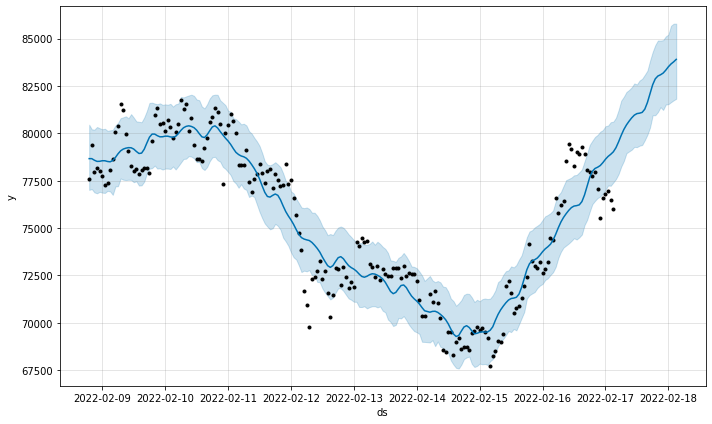

In [43]:
#그래프1
fig1 = model.plot(forecast)

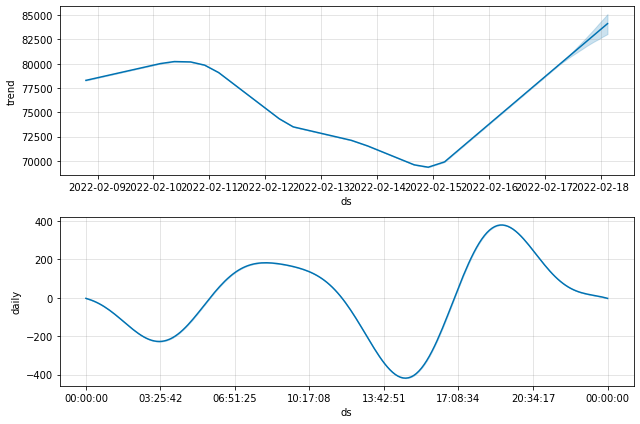

In [44]:
#그래프2
fig2 = model.plot_components(forecast)

In [45]:
#매수 시점의 가격
nowValue = pyupbit.get_current_price("KRW-AXS")
nowValue

76000.0

In [46]:
#종가의 가격을 구함

#현재 시간이 자정 이전
closeDf = forecast[forecast['ds'] == forecast.iloc[-1]['ds'].replace(hour=9)]

#현재 시간이 자정 이후
if len(closeDf) == 0:
  closeDf = forecast[forecast['ds'] == data.iloc[-1]['ds'].replace(hour=9)]

#어쨋든 당일 종가
closeValue = closeDf['yhat'].values[0]
closeValue

80642.70024274735

In [47]:
#구체적인 가격
print("현재 시점 가격: ", nowValue)
print("종가의 가격: ", closeValue)

현재 시점 가격:  76000.0
종가의 가격:  80642.70024274735


In [48]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-02-08 19:00:00,78287.420736,77015.638758,80457.879158,78287.420736,78287.420736,378.667593,378.667593,378.667593,378.667593,378.667593,378.667593,0.0,0.0,0.0,78666.088329
1,2022-02-08 20:00:00,78341.454928,77059.769145,80214.264791,78341.454928,78341.454928,323.760561,323.760561,323.760561,323.760561,323.760561,323.760561,0.0,0.0,0.0,78665.215489
2,2022-02-08 21:00:00,78395.489120,76883.325235,80196.670333,78395.489120,78395.489120,185.886315,185.886315,185.886315,185.886315,185.886315,185.886315,0.0,0.0,0.0,78581.375435
3,2022-02-08 22:00:00,78449.523312,76836.559482,80337.686062,78449.523312,78449.523312,71.044676,71.044676,71.044676,71.044676,71.044676,71.044676,0.0,0.0,0.0,78520.567988
4,2022-02-08 23:00:00,78503.557504,76912.563034,80273.124537,78503.557504,78503.557504,20.981955,20.981955,20.981955,20.981955,20.981955,20.981955,0.0,0.0,0.0,78524.539459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,2022-02-17 23:00:00,83314.675363,81520.840839,85119.725871,82513.124114,84049.688929,20.981955,20.981955,20.981955,20.981955,20.981955,20.981955,0.0,0.0,0.0,83335.657318
220,2022-02-18 00:00:00,83518.057381,81541.308108,85212.029704,82655.780992,84318.305607,-2.690247,-2.690247,-2.690247,-2.690247,-2.690247,-2.690247,0.0,0.0,0.0,83515.367134
221,2022-02-18 01:00:00,83721.439400,81646.506897,85680.785916,82795.493047,84576.760281,-57.611000,-57.611000,-57.611000,-57.611000,-57.611000,-57.611000,0.0,0.0,0.0,83663.828400
222,2022-02-18 02:00:00,83924.821418,81744.742595,85791.448076,82926.788827,84838.539892,-149.401903,-149.401903,-149.401903,-149.401903,-149.401903,-149.401903,0.0,0.0,0.0,83775.419515
